In [30]:
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp

In [33]:
migpumas = gpd.read_file("data/ipums_migpuma_pwpuma_2010/ipums_migpuma_pwpuma_2010.shp").set_index("GISMATCH")

In [34]:
migpumas

,GISMATCH,STATEFIP,State,MIGPLAC,MIGPUMA,PWSTATE,PWPUMA,geometry
0,600100,06,California,006,00100,06,00100,"MULTIPOLYGON (((-2247215.331 305414.315, -2247..."
1,600700,06,California,006,00700,06,00700,"POLYGON ((-2109286.066 514980.044, -2109870.85..."
2,601100,06,California,006,01100,06,01100,"POLYGON ((-2176959.324 718143.586, -2176964.76..."
3,601300,06,California,006,01300,06,01300,"MULTIPOLYGON (((-2206584.289 357733.694, -2206..."
4,601500,06,California,006,01500,06,01500,"MULTIPOLYGON (((-2293024.796 785731.068, -2293..."
...,...,...,...,...,...,...,...,...
1000,1304007,13,Georgia,013,04007,13,04007,"POLYGON ((1107917.124 -309977.513, 1108009.534..."
1001,5151000,51,Virginia,051,51000,51,51000,"POLYGON ((1391741.941 168720.346, 1392135.152 ..."
1002,5151001,51,Virginia,051,51001,51,51001,"POLYGON ((1509011.131 247266.176, 1509012.297 ..."
1003,4500600,45,South Carolina,045,00600,45,00600,"POLYGON ((1412304.662 -207666.938, 1412316.516..."


In [35]:
migpumas.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

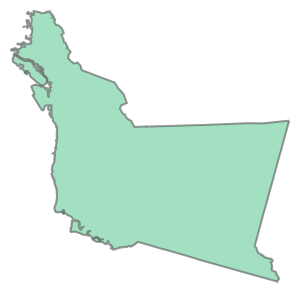

In [36]:
migpumas.loc[0].geometry

In [37]:
distances = pd.read_csv("data/puma_distance_matrix.csv").set_index("Unnamed: 0")

In [38]:
distances

,Unnamed: 0,0600105,0600102,0608502,0600108,0600107,0600101,0600110,0608504,0600109,...,2602200,2600900,4702402,4702300,4702401,4700500,4702501,5310400,5310300,5310100
0,600100,0,0,39057,0,0,0,0,32785,0,...,3659560,3658028,3704534,3707792,3697348,3709156,3675491,1510819,1366000,1521187
1,600700,267650,254154,308889,293346,284521,247767,274332,302616,290360,...,3548479,3546947,3757628,3748449,3750726,3741417,3716148,1293877,1149057,1304245
2,601100,342063,328567,383302,367759,358934,322180,361853,377029,364773,...,3646878,3645346,3856026,3846847,3849125,3839816,3814546,1246358,1101538,1256725
3,601300,54185,44346,90212,80011,67520,45446,68763,83940,71683,...,3635231,3633699,3743085,3746342,3735899,3747707,3714042,1486490,1341670,1496858
4,601500,487278,473782,528517,512974,504149,467395,507068,522244,509987,...,3594176,3592644,3803325,3794145,3796423,3787114,3761844,1149082,1004262,1159450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1304007,3996091,4004766,3970737,3980928,3987472,4012807,3958553,3961958,3991797,...,1210028,1269788,373179,429406,391176,457262,418124,4143960,4251644,4527073
971,5151000,4385759,4394434,4360405,4370596,4377141,4402476,4348221,4351626,4381466,...,917732,1041456,718843,663499,695569,705881,692139,4231226,4338910,4661344
972,5151001,4543694,4530198,4542272,4569390,4560565,4523811,4547511,4533493,4566404,...,1050887,1169711,900710,845366,877436,887748,874006,4350356,4458040,4780474
973,4500600,4316959,4325634,4291605,4301796,4308341,4333676,4279421,4282827,4312666,...,1193418,1317143,712110,689738,721808,732120,718377,4444109,4551794,4827222


In [39]:
migpumas["centroid"] = migpumas.centroid

In [40]:
from pyproj import Transformer, CRS

In [41]:
curr_crs = migpumas.crs

In [42]:
migpumas = migpumas.to_crs("EPSG:4326")

In [43]:
trans = Transformer.from_crs(curr_crs, CRS("epsg:4326"))

In [45]:
"""Can't calculate centroids accurately in degrees, convert centroids from previous projection to latlon instead"""
migpumas["centroid"] = migpumas["centroid"].apply(lambda x: trans.transform(x.x, x.y))
migpumas["centroid"] = migpumas["centroid"].apply(lambda x: shp.Point(x[1], x[0]))
migpumas

,GISMATCH,STATEFIP,State,MIGPLAC,MIGPUMA,PWSTATE,PWPUMA,geometry,centroid
0,600100,06,California,006,00100,06,00100,"MULTIPOLYGON (((-121.97269 37.46792, -121.9722...",POINT (-121.88595128707925 37.6464828361466)
1,600700,06,California,006,00700,06,00700,"POLYGON ((-121.07670 39.59727, -121.07955 39.5...",POINT (-121.60070173513378 39.66655683332212)
2,601100,06,California,006,01100,06,01100,"POLYGON ((-122.49838 41.18267, -122.49835 41.1...",POINT (-122.58270749419927 40.112892560670204)
3,601300,06,California,006,01300,06,01300,"MULTIPOLYGON (((-121.68520 38.01493, -121.6849...",POINT (-121.92755433806737 37.91587237101338)
4,601500,06,California,006,01500,06,01500,"MULTIPOLYGON (((-124.06898 41.46815, -124.0690...",POINT (-121.48245107171225 41.154897617532605)
...,...,...,...,...,...,...,...,...,...
1000,1304007,13,Georgia,013,04007,13,04007,"POLYGON ((-83.86899 34.09863, -83.86803 34.098...",POINT (-84.02366095459307 33.961681384769946)
1001,5151000,51,Virginia,051,51000,51,51000,"POLYGON ((-79.93325 37.95319, -79.92987 37.947...",POINT (-79.95836506198097 37.38245820562837)
1002,5151001,51,Virginia,051,51001,51,51001,"POLYGON ((-78.44298 38.45892, -78.44297 38.458...",POINT (-78.44492189612855 37.95694227096871)
1003,4500600,45,South Carolina,045,00600,45,00600,"POLYGON ((-80.40657 34.60835, -80.40644 34.608...",POINT (-80.85509046899814 34.161013235877355)


In [62]:
from haversine import haversine, Unit

In [66]:
migpumas["dist"] = -1

In [70]:
for i, row in migpumas.iterrows():
    print(i)
    min_dist = 99999999999
    max_dist = -1
    if type(row["geometry"]) == type(migpumas.iloc[0]["geometry"]):
        for polygon in row["geometry"]:
            for point in polygon.exterior.coords:
                dist = haversine((row["centroid"].y, row["centroid"].x), (point[1], point[0]), unit=Unit.METERS)
                min_dist = min(min_dist, dist)
                max_dist = max(min_dist, dist)
    else:
        for point in row["geometry"].exterior.coords:
                dist = haversine((row["centroid"].y, row["centroid"].x), (point[1], point[0]), unit=Unit.METERS)
                min_dist = min(min_dist, dist)
                max_dist = max(min_dist, dist)
    migpumas.loc[i, "dist"] = (max_dist + min_dist) / 2

0


C:\Users\yianz\AppData\Local\Temp\ipykernel_40992\3357486078.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in row["geometry"]:


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [84]:
for i in distances.index:
    print(i)
    distances.loc[i] = distances.loc[i].replace(0, migpumas.loc[i, "dist"])

600100
600700
601100
601300
601500
601700
601900
602300
602900
603100
603300
603700
603900
604100
604700
605300
605500
605700
605900
606100
606700
607500
607700
607900
608100
608300
608500
608700
608900
609500
609700
609900
610100
610700
611100
611300
3200100
3200200
4100400
4100500
4100600
4100700
4100800
4100900
4101000
4101100
4101200
4101325
4101326
4101327
5311100
5311200
5311300
5311400
5311500
5311800
100190
101590
102600
102700
400100
400200
400700
400800
400900
500900
501100
501200
501600
501790
501900
502000
602500
2200100
2200200
2200300
2200400
2200500
2200600
2200700
2200890
2201000
2201100
2201200
2201300
2201400
2201500
2201600
2201700
2201800
2201900
2202000
2202100
2202200
2202390
2202400
2800100
2800200
2800300
2800400
2800500
2800600
2800700
2800800
2800990
2801300
2801400
2801500
2801600
2801700
2801800
2801900
2802000
2802100
3500790
3500900
3501000
3501100
3501200
4000300
4000600
4000700
4000800
4000900
4001000
4703200
4800300
4800400
4800500
4800600
4800700
48008

In [90]:
distances.to_csv("data/puma_distance_matrix_fixed.csv")